In [1]:
import pandas as pd
df2= {'Team':['Riders','Riders','Devils','Devils','Kings','Kings','Kings','Kings','Riders','Royals','Royals','Royals'],
            'Rank':[1,2,2,3,3,4,1,1,2,4,1,2],
            'Year':[2014,2015,2014,2015,2014,2015,2016,2017,2016,2014,2015,2017],
            'Points':[876,789,863,673,741,812,756,788,694,701,884,690],
            
           }
df=pd.DataFrame(df2)
df

,Team,Rank,Year,Points
0,Riders,1,2014,876
1,Riders,2,2015,789
2,Devils,2,2014,863
3,Devils,3,2015,673
4,Kings,3,2014,741
5,Kings,4,2015,812
6,Kings,1,2016,756
7,Kings,1,2017,788
8,Riders,2,2016,694
9,Royals,4,2014,701


In [2]:
import matplotlib.pyplot as plt

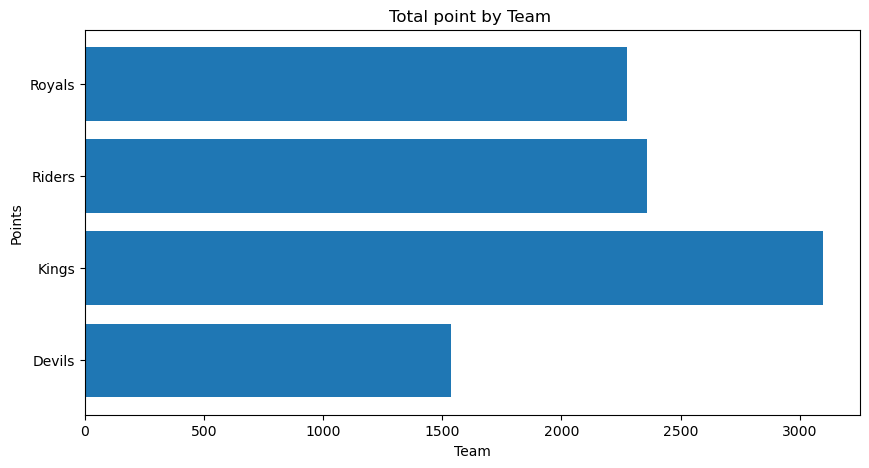

In [9]:
# Q1.Har team ke total points ka bar chart banao.
a=df.groupby('Team')['Points'].sum()
plt.figure(figsize=(10,5))
plt.barh(a.index,a.values)
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('Total point by Team ')
plt.show()


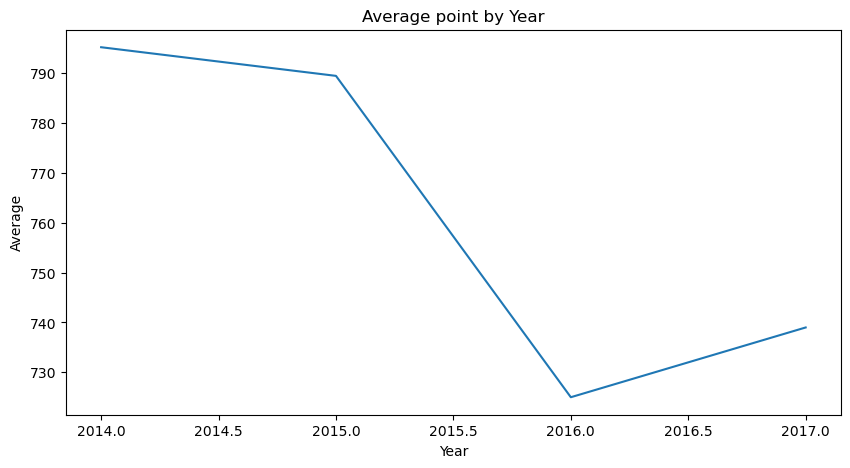

In [7]:
# Q2. Year-wise average points ka line chart banao.
a=df.groupby('Year')['Points'].mean()
a
plt.figure(figsize=(10,5))
plt.plot(a.index,a.values)
plt.xlabel('Year')
plt.ylabel('Average')
plt.title('Average point by Year')
plt.show()

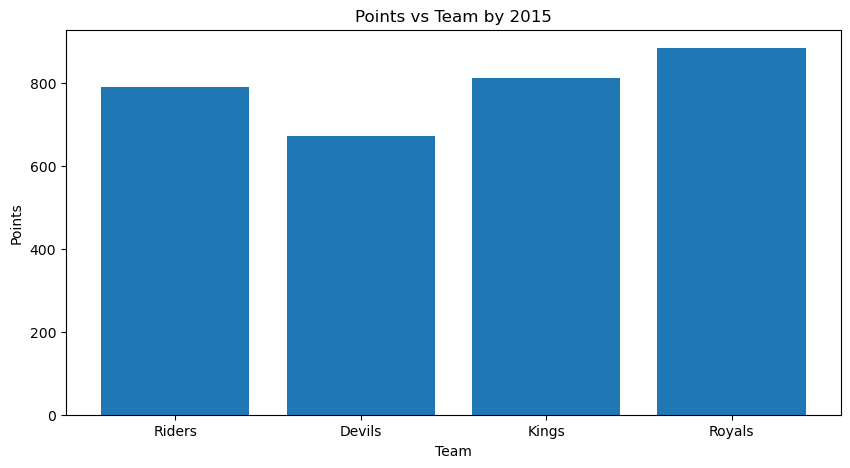

In [8]:
 # Q3. Sirf 2015 ke data ka bar chart banao (Team vs Points).
a=df[df['Year']==2015]
b=a[['Team','Points']]
 
plt.figure(figsize=(10,5))
plt.bar(b['Team'], b['Points'])
plt.xlabel('Team')
plt.ylabel('Points')
plt.title('Points vs Team by 2015')
plt.show()


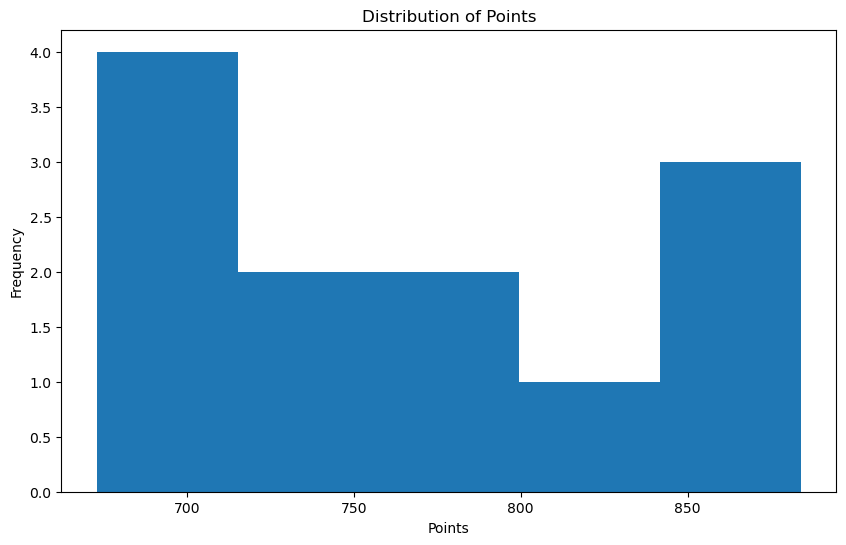

In [10]:
# Q4. Points ka histogram banao aur distribution observe karo.
plt.figure(figsize=(10,6))
plt.hist(df['Points'], bins=5)
plt.xlabel('Points')
plt.ylabel('Frequency')
plt.title('Distribution of Points')
plt.show()


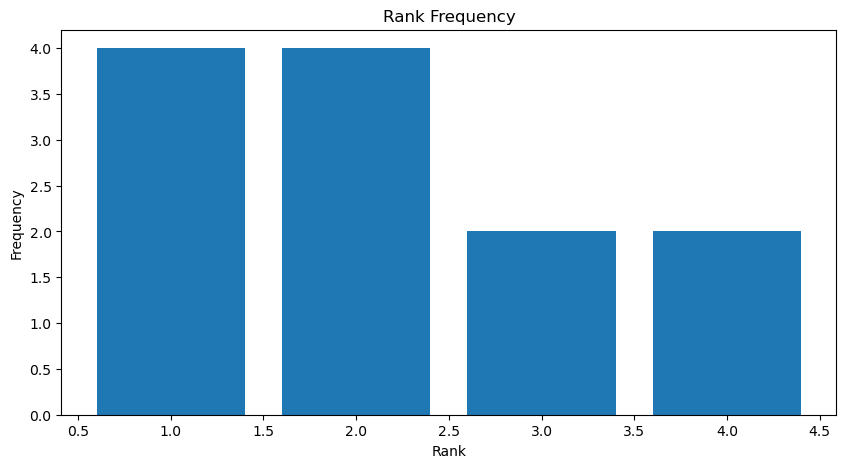

In [17]:
# Q5 Rank ka bar chart banao (rank frequency).
rank_counts = df['Rank'].value_counts().sort_index()
rank_counts

plt.figure(figsize=(10,5))
plt.bar(rank_counts.index, rank_counts.values)
plt.xlabel('Rank')
plt.ylabel('Frequency')
plt.title('Rank Frequency')
plt.show()


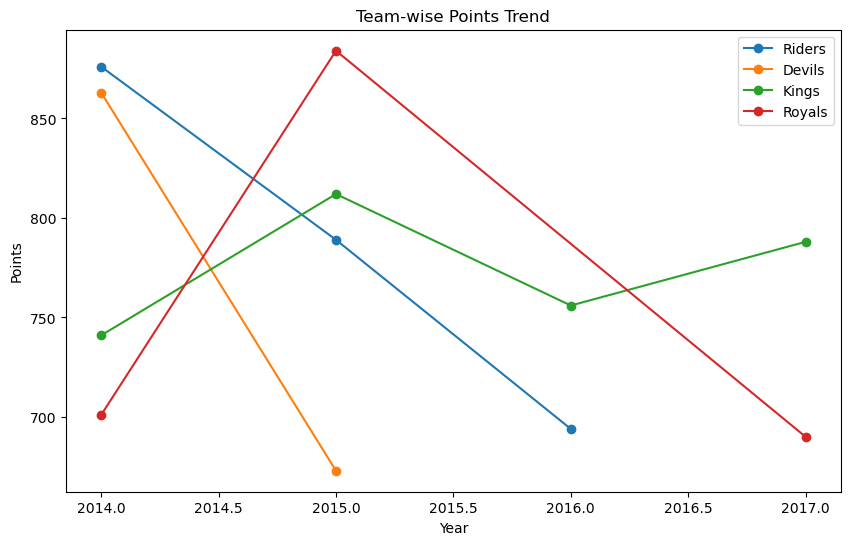

In [18]:
# Q6 Har team ke points ka trend (Year vs Points) ek hi line chart
plt.figure(figsize=(10,6))
for team in df['Team'].unique():
    team_data = df[df['Team'] == team]
    plt.plot(team_data['Year'], team_data['Points'], marker='o', label=team)

plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Team-wise Points Trend')
plt.legend()
plt.show()


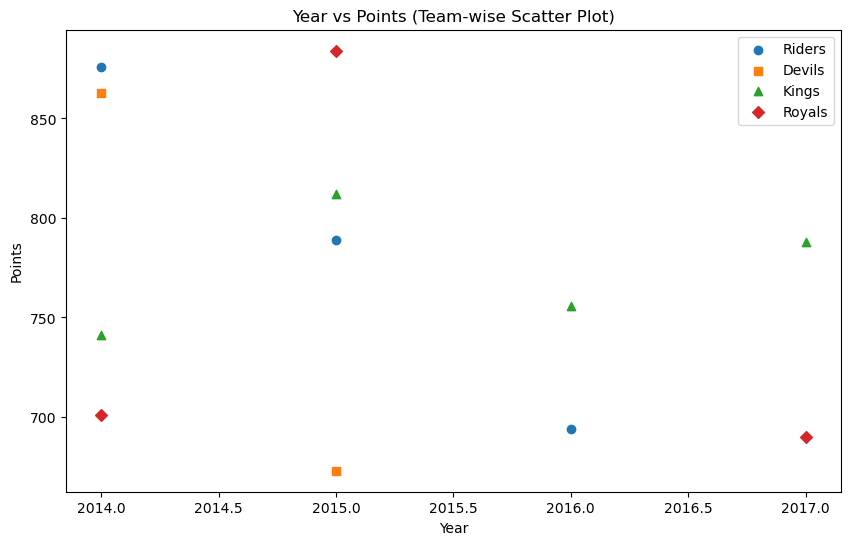

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))

# Unique teams nikal lo
teams = df['Team'].unique()

# Different markers define karo
markers = ['o', 's', '^', 'D', 'v', '*']

for i, team in enumerate(teams):
    team_data = df[df['Team'] == team]
    
    plt.scatter(
        team_data['Year'],
        team_data['Points'],
        marker=markers[i],
        label=team
    )

plt.xlabel('Year')
plt.ylabel('Points')
plt.title('Year vs Points (Team-wise Scatter Plot)')
plt.legend()
plt.show()
